Problem 1:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


Data Ingestion: 
Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. 
Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.


Data Preparation: 

Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). 
Modelling:

Apply Logistic Regression and LDA (linear discriminant analysis).
Apply KNN Model and Naïve Bayes Model. Interpret the results. 
Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting.
Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. 
Inference:

Based on these predictions, what are the insights?

Data Ingestion: 

Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. 
Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

Solution

Data Ingestion Steps:

Read the dataset:

•	Open jupyter notebook and as per the codes mentioned in jupyter notebook perform the following.
•	Import all the necessary libraries viz., numpy, pandas, matplotlib, seaborn, sklearn.  
•	Read the dataset ‘Election_Data.xlsx’. in pandas dataframe for both sheets. 
•	Checking the head of the data of both sheets.

DESCRIPTIVE STATISTICS:

•	Consider sheet 2 (sheet named ‘Election_Dataset_Two Classes’ for doing statistical data analysis of elections data.
•	Check Shape or dimensions.
•	Check the Information about the data and the datatypes of each respective attributes.
•	Check summary of the data for both categorical and numerical variables.
•	Check for unwanted variables. If exists drop them.

Null-value condition check:

•	Checking for missing values in any column

EXPLORATORY DATA ANALYSIS:

•	Check for duplicate data. Duplicates to be removed.
•	Check summary of the data for both categorical and numerical variables.
•	Checking for outliers in the dataset and if any, outliers to be treated.
•	Impute missing values, outliers, if required.
•	Doing univariate, bivariate or multivariate analysis
•	Checking pairwise distribution of the continuous variables
•	Checking for correlation


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import warnings
warnings.filterwarnings("ignore")

In [2]:
excel_file = 'Election_Data.xlsx'
edf = pd.read_excel("Election_Data.xlsx")

In [3]:
df_s1=pd.read_excel(excel_file, sheet_name=0, index_col=0)

In [4]:
df_s1.head(9)

""
**Data Dictionary**
1. vote: Party choice: Conservative or Labour
2. age: in years
"3. economic.cond.national: Assessment of current national economic conditions, 1 to 5."
"4. economic.cond.household: Assessment of current household economic conditions, 1 to 5."
"5. Blair: Assessment of the Labour leader, 1 to 5."
"6. Hague: Assessment of the Conservative leader, 1 to 5."
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
"8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3."
9. gender: female or male.


In [5]:
df_s2=pd.read_excel(excel_file, sheet_name=1, index_col=0)

In [6]:
df_s2.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [7]:
df_s2.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1521,Conservative,67,5,3,2,4,11,3,male
1522,Conservative,73,2,2,4,4,8,2,male
1523,Labour,37,3,3,5,4,2,2,male
1524,Conservative,61,3,3,1,4,11,2,male
1525,Conservative,74,2,3,2,4,11,0,female


In [8]:
df_s2.shape

(1525, 9)

In [9]:
df_s2.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [10]:
df_s2.dtypes.value_counts()

int64     7
object    2
dtype: int64

In [11]:
df_s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [12]:
df_s2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Null value Check**

In [13]:
df_s2.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

EXPLORATORY DATA ANALYSIS

**Are there any duplicate records, Check for duplicate data**

In [14]:
dups = df_s2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_s2[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female
1237,Labour,36,3,3,2,2,6,2,female
1245,Labour,29,4,4,4,2,2,2,female
1439,Labour,40,4,3,4,2,2,2,male


In [15]:
df_s2.drop_duplicates(inplace=True)

In [16]:
dups = df_s2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_s2[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


Making different list for categorical columns and numerical columns

In [17]:
cat=[]
num=[]
for i in df_s2.columns:
    if df_s2[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


Describe for numerical and categorical columns

In [18]:
df_s2[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [19]:
df_s2[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


**Univariate Analysis**

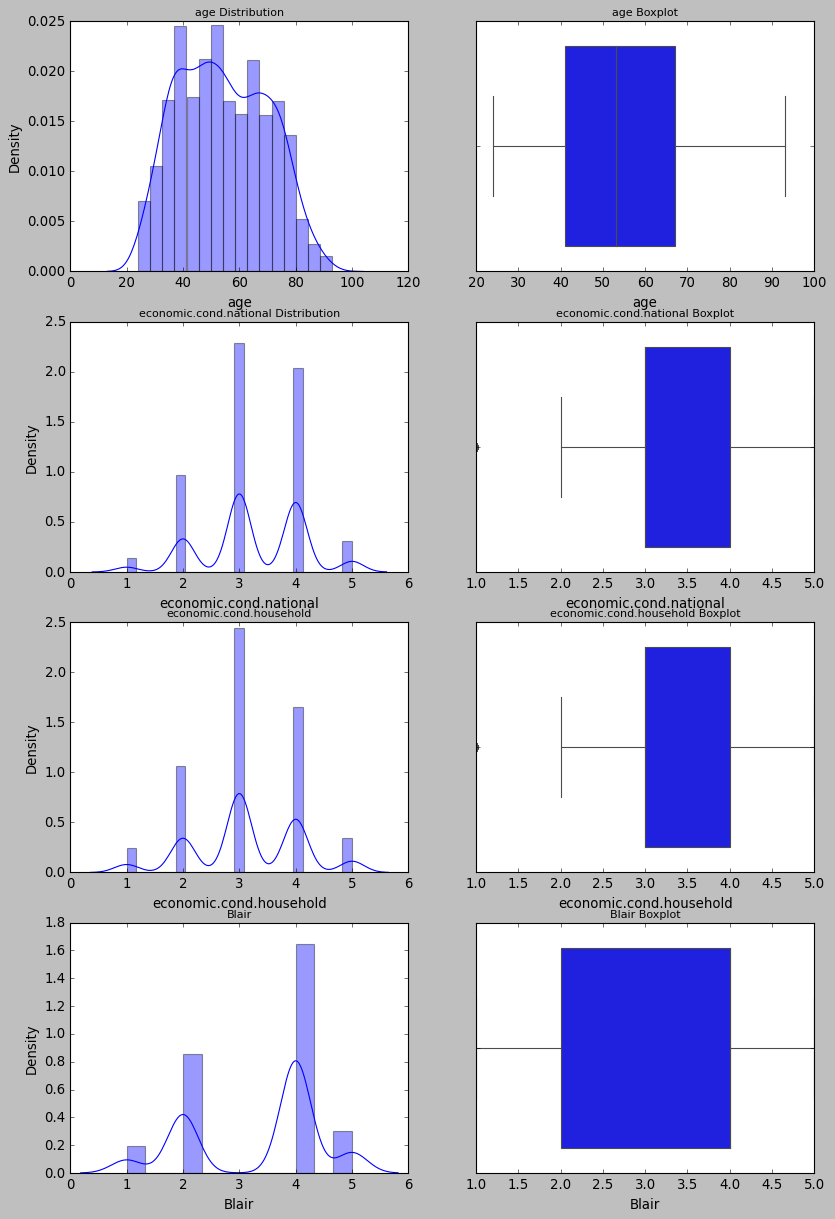

In [20]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,18)
a = sns.distplot(df_s2['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df_s2['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df_s2['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df_s2['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df_s2['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household",fontsize=10)

a = sns.boxplot(df_s2['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df_s2['Blair'] , ax=axes[3][0])
a.set_title("Blair",fontsize=10)

a = sns.boxplot(df_s2['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

plt.show()

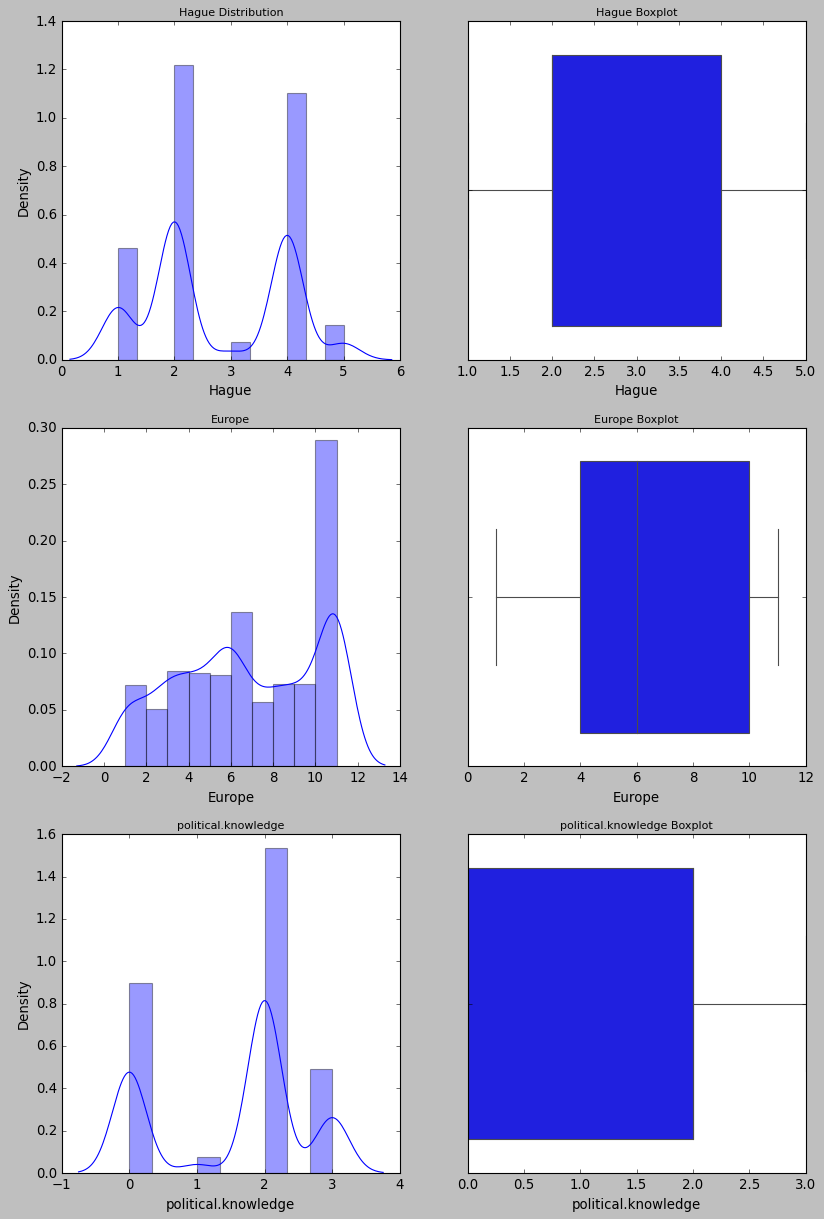

In [21]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,18)
a = sns.distplot(df_s2['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df_s2['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df_s2['Europe'] , ax=axes[1][0])
a.set_title("Europe",fontsize=10)

a = sns.boxplot(df_s2['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df_s2['political.knowledge'] , ax=axes[2][0])
a.set_title("political.knowledge",fontsize=10)

a = sns.boxplot(df_s2['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()

###  Bivariate and Multivariate Analysis

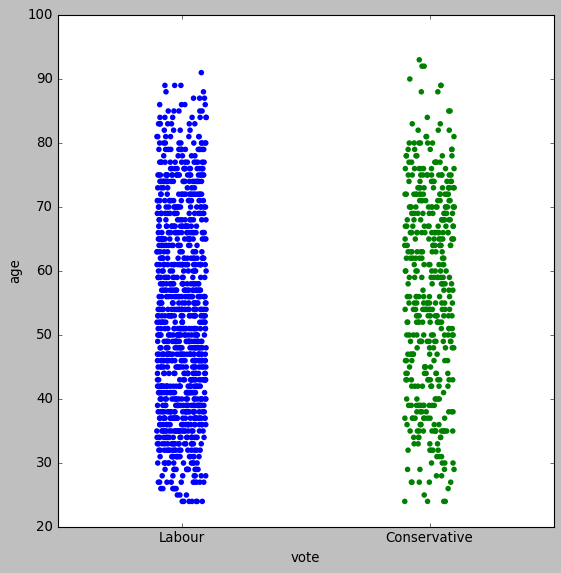

In [22]:
plt.figure(figsize=(8,8))
sns.stripplot(df_s2["vote"], df_s2['age'], jitter=True) 
plt.show()

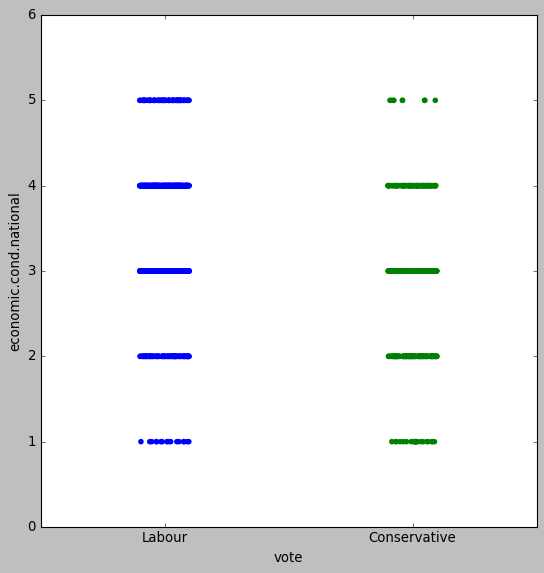

In [23]:
plt.figure(figsize=(8,8))
sns.stripplot(df_s2["vote"], df_s2['economic.cond.national'], jitter=True) 
plt.show()

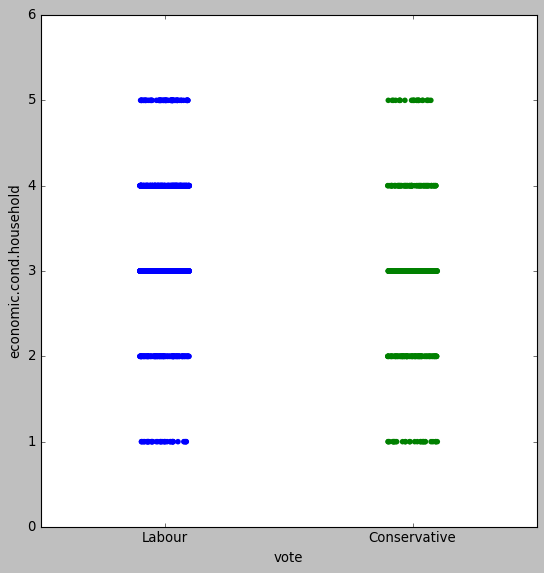

In [24]:
plt.figure(figsize=(8,8))
sns.stripplot(df_s2["vote"], df_s2['economic.cond.household'], jitter=True) 
plt.show()

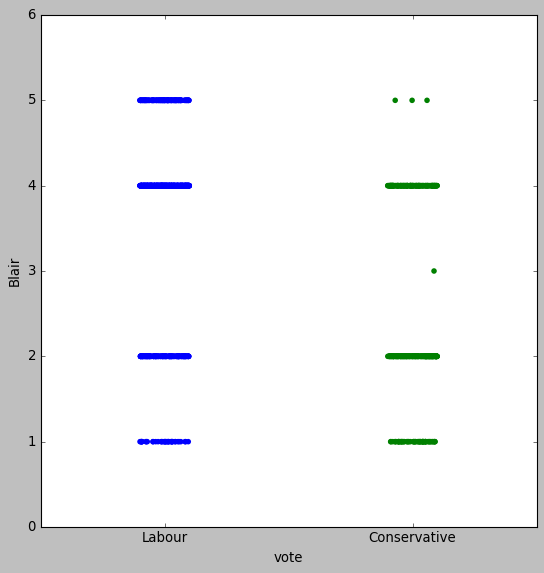

In [25]:
plt.figure(figsize=(8,8))
sns.stripplot(df_s2["vote"], df_s2['Blair'], jitter=True) 
plt.show()

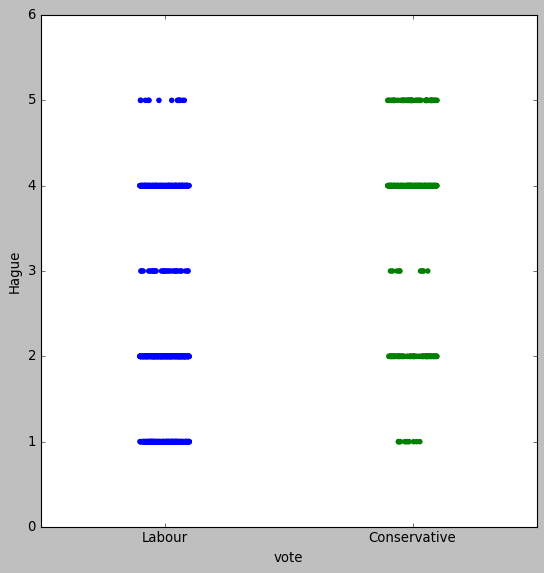

In [26]:
plt.figure(figsize=(8,8))
sns.stripplot(df_s2["vote"], df_s2['Hague'], jitter=True) 
plt.show()

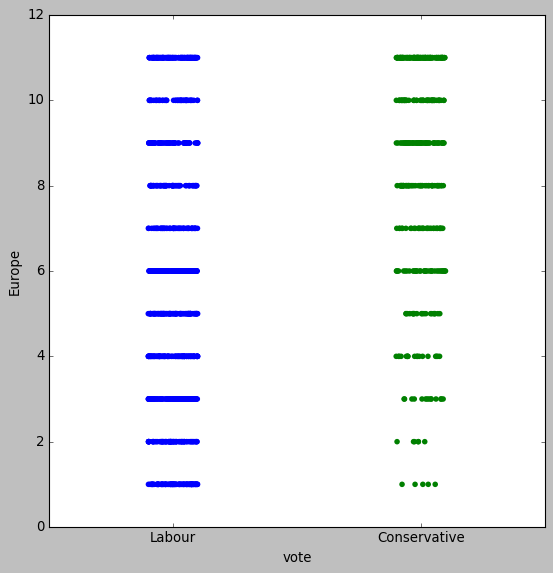

In [27]:
plt.figure(figsize=(8,8))
sns.stripplot(df_s2["vote"], df_s2['Europe'], jitter=True) 
plt.show()

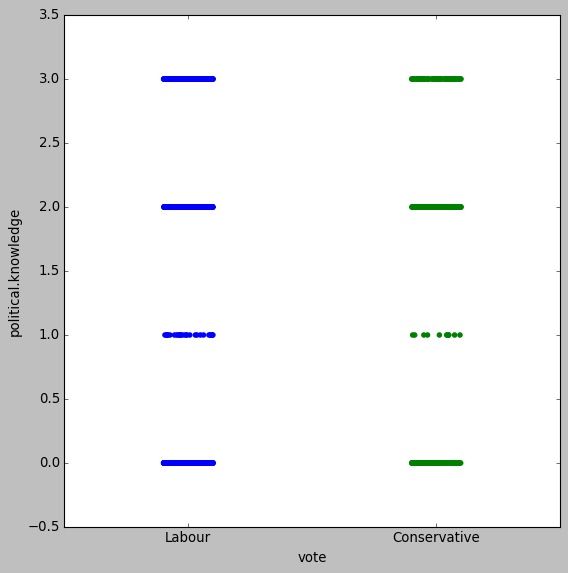

In [28]:
plt.figure(figsize=(8,8))
sns.stripplot(df_s2["vote"], df_s2['political.knowledge'], jitter=True) 
plt.show()

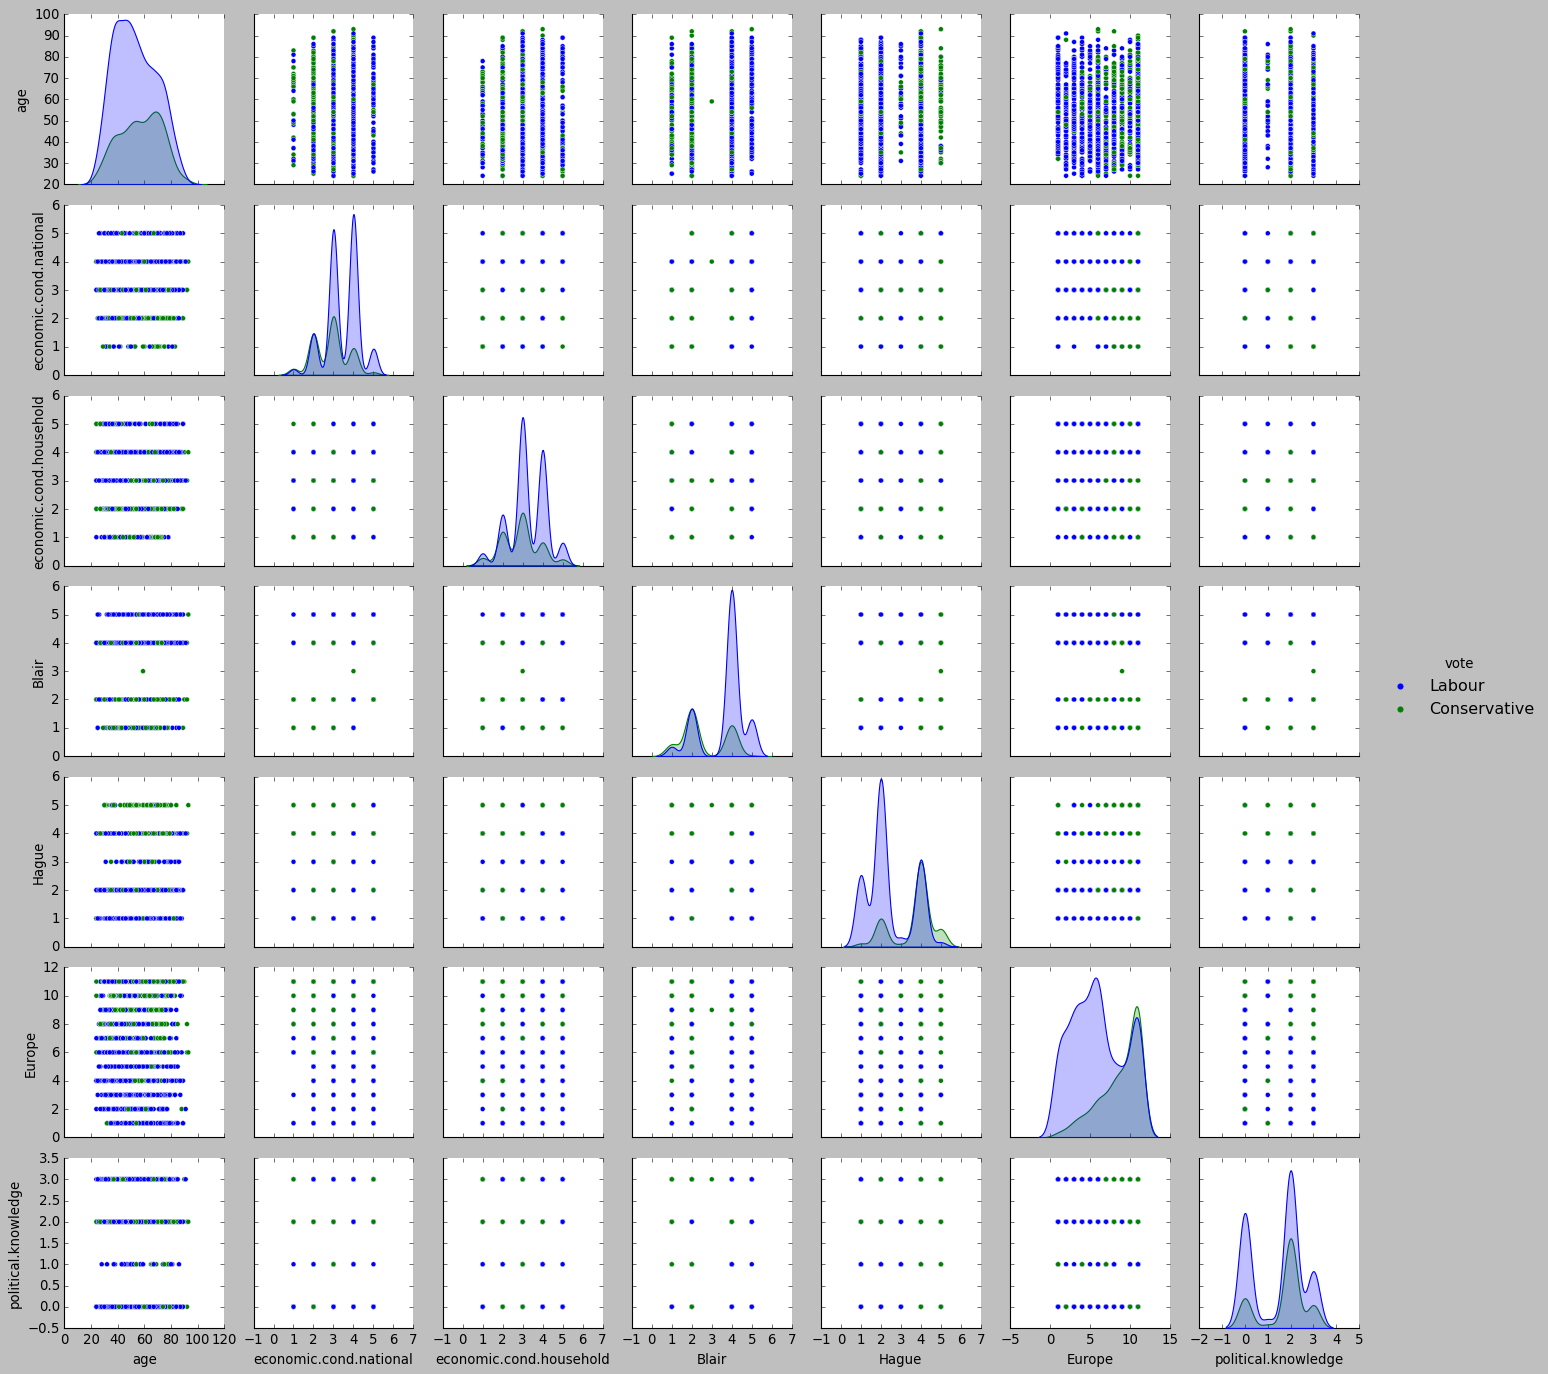

In [29]:
sns.pairplot(df_s2,hue="vote")

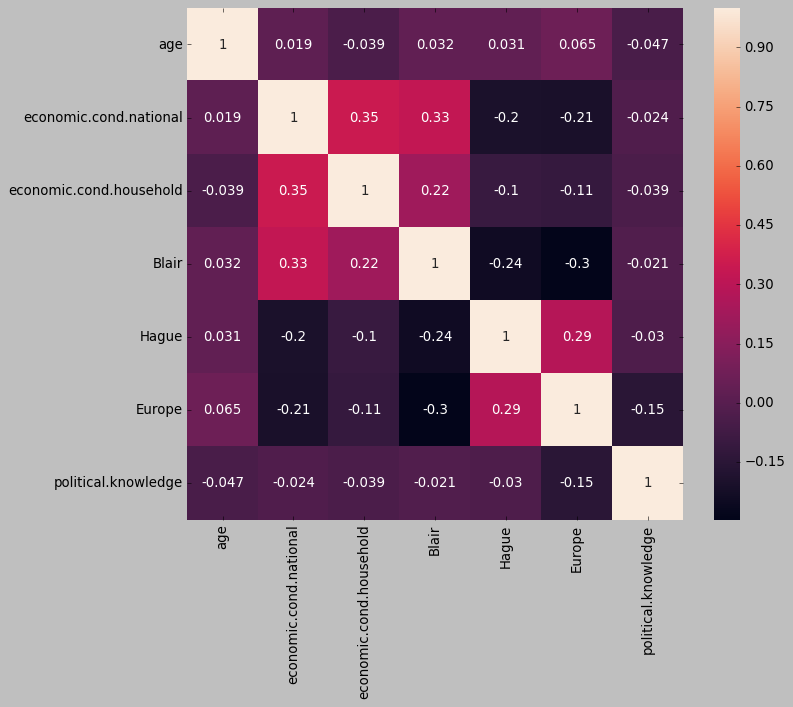

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df_s2.corr(),annot=True)
plt.show()

#### Outlier Check

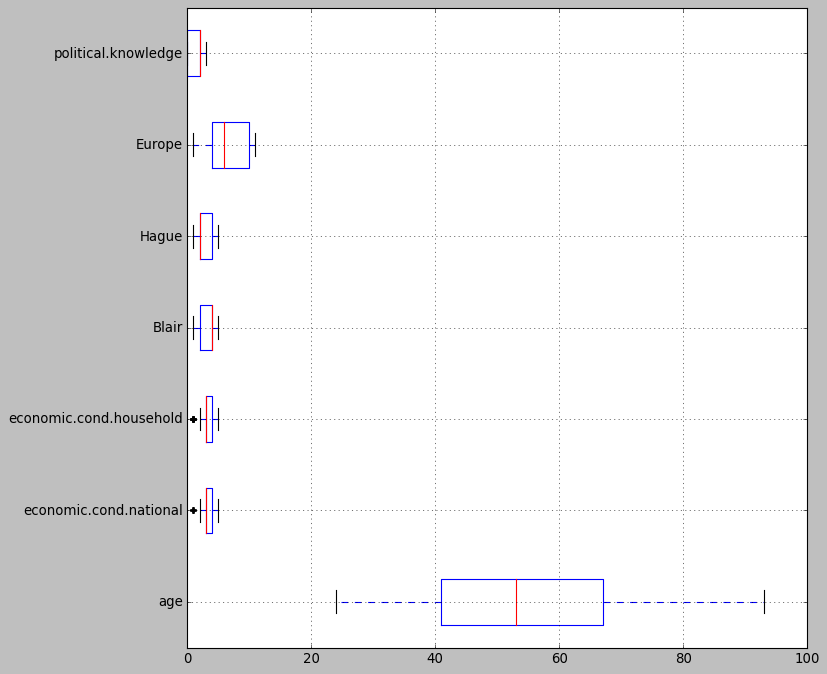

In [31]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df_s2[num].boxplot(vert=0)
plt.show()

**There are nearly no outliers in most of the numerical columns, only outlier is in award variable. In Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. So depending on our use case, it makes sense to remove outlier .**

### outlier treatment

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [33]:
lr,ur=remove_outlier(df_s2["economic.cond.national"])
df_s2["economic.cond.national"]=np.where(df_s2["economic.cond.national"]<lr,lr,df_s2["economic.cond.national"])

In [34]:
lr,ur=remove_outlier(df_s2["economic.cond.household"])
df_s2["economic.cond.household"]=np.where(df_s2["economic.cond.household"]<lr,lr,df_s2["economic.cond.household"])

<AxesSubplot:>

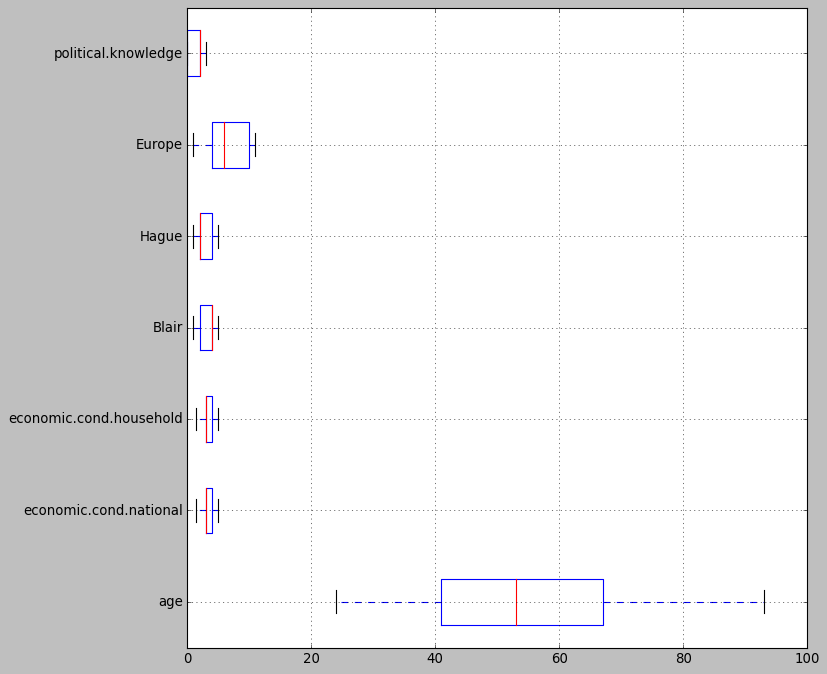

In [35]:
plt.figure(figsize=(10,10))
df_s2[num].boxplot(vert=0)

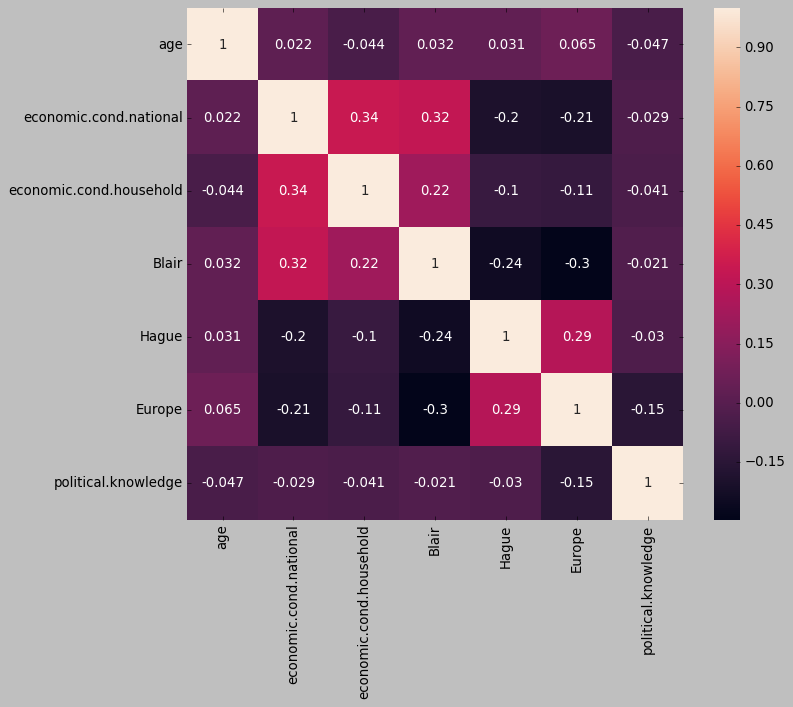

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df_s2.corr(),annot=True)
plt.show()

Data Preparation: 5 marks

Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

In [37]:
df_s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   object 
 1   age                      1517 non-null   int64  
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   int64  
 5   Hague                    1517 non-null   int64  
 6   Europe                   1517 non-null   int64  
 7   political.knowledge      1517 non-null   int64  
 8   gender                   1517 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 158.5+ KB


The above information is after removing duplicates.
•	vote is the target variable while all others are the predictors.  Out of the 9 columns, 2 are object type, while remaining 5 are int and 2 float
Object - vote and gender; 
Int -'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge'
It appears there are also no missing values.
•	Since label encoding is already present in the data, some of the nominal variables are displayed as int.
Actual Nominal variables are 7: ‘vote’ and ‘gender ' ‘economic.cond.national', 'economic.cond.household', 'Blair', 'Hague',  'Europe' and 'political.knowledge'
•	Actual Numeric variables are 1: age.
The encoding is to be done for two categorical varibales viz., vote and gender for modelling purpose as shown below:

#### checking for Possible columns which are categorical but are not having data type "object"

In [38]:
df_s2['age'].value_counts()

37    42
49    39
47    38
35    38
46    37
      ..
87     3
92     2
91     1
90     1
93     1
Name: age, Length: 70, dtype: int64

In [39]:
df_s2['economic.cond.national'].value_counts()

3.0    604
4.0    538
2.0    256
5.0     82
1.5     37
Name: economic.cond.national, dtype: int64

In [40]:
df_s2['economic.cond.household'].value_counts()

3.0    645
4.0    435
2.0    280
5.0     92
1.5     65
Name: economic.cond.household, dtype: int64

In [41]:
df_s2['Blair'].value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

In [42]:
df_s2['Hague'].value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

In [43]:
df_s2['Europe'].value_counts()

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

In [44]:
df_s2['political.knowledge'].value_counts()

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

Two variables require encoding as they have string values remaining  all are given encoded values in the dataset itself except for age which is a numerical varibale.

Dealing with categorical data
Change all the classes to numericals with the help of **pd.Categorical().codes** 

In [45]:
df_s2["vote"].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [46]:
df_s2["vote"]=pd.Categorical(df_s2["vote"]).codes

In [47]:
df_s2["vote"].value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [48]:
df_s2["gender"].value_counts()

female    808
male      709
Name: gender, dtype: int64

In [49]:
df_s2["gender"]=pd.Categorical(df_s2["gender"]).codes

In [50]:
df_s2["gender"].value_counts()

0    808
1    709
Name: gender, dtype: int64

In [51]:
df_s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   int8   
 1   age                      1517 non-null   int64  
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   int64  
 5   Hague                    1517 non-null   int64  
 6   Europe                   1517 non-null   int64  
 7   political.knowledge      1517 non-null   int64  
 8   gender                   1517 non-null   int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 137.8 KB


### Train-Test Split

In [52]:
df_s2.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [53]:
# Copy all the predictor variables into X dataframe
X = df_s2.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df_s2['vote']

In [54]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,43,3.0,3.0,4,1,2,2,0
2,36,4.0,4.0,4,4,5,2,1
3,35,4.0,4.0,5,2,3,2,1
4,24,4.0,2.0,2,1,4,0,0
5,41,2.0,2.0,1,1,6,2,1


In [55]:
y.head()

1    1
2    1
3    1
4    1
5    1
Name: vote, dtype: int8

In [56]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [57]:
y_train.value_counts(1)

1    0.696513
0    0.303487
Name: vote, dtype: float64

In [58]:
y_test.value_counts(1)

1    0.697368
0    0.302632
Name: vote, dtype: float64

Fitting Logistic Regression MODEL

In [59]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [60]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [61]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [62]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.209115,0.790885
1,0.621058,0.378942
2,0.080761,0.919239
3,0.030094,0.969906
4,0.136223,0.863777


Logistic regression Model Evaluation

In [63]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.827521206409048

### AUC and ROC for the training data

AUC: 0.877


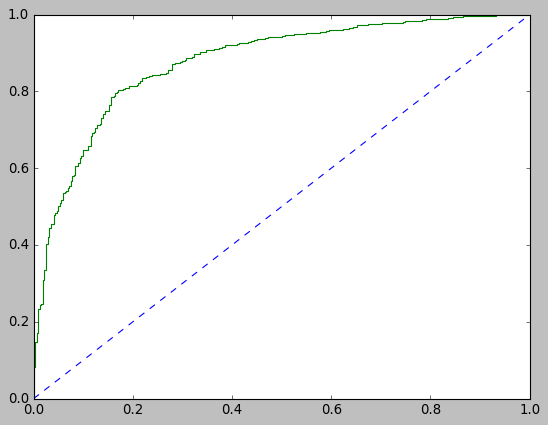

In [64]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [65]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8574561403508771

### AUC and ROC for the test data

AUC: 0.877


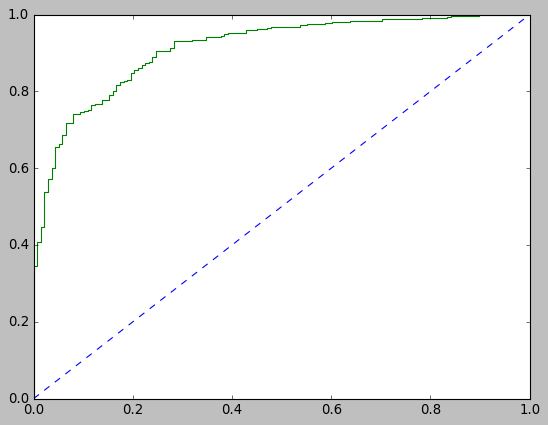

In [66]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [67]:
confusion_matrix(y_train, ytrain_predict)

array([[214, 108],
       [ 75, 664]], dtype=int64)

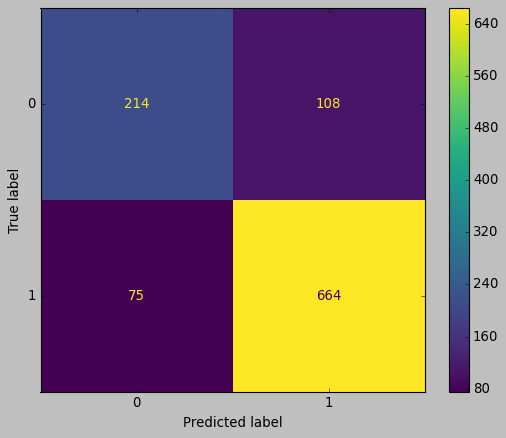

In [68]:
plot_confusion_matrix(model,X_train,y_train);

In [69]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



### Confusion Matrix for test data

In [70]:
confusion_matrix(y_test, ytest_predict)

array([[ 94,  44],
       [ 21, 297]], dtype=int64)

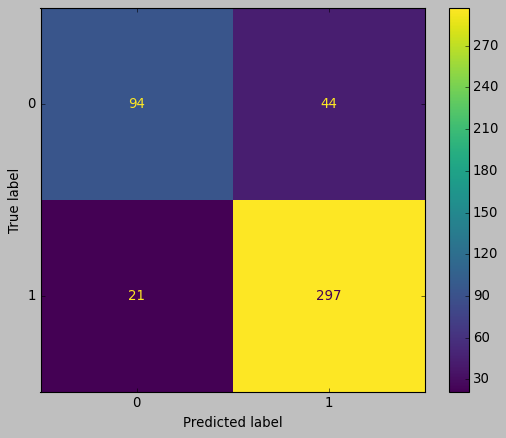

In [71]:
plot_confusion_matrix(model,X_test,y_test);

In [72]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



LINEAR DISCRIMINANT ANALYSIS (LDA)
Fitting LDA

In [73]:
df = df_s2.copy()

In [74]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,1,43,3.0,3.0,4,1,2,2,0
2,1,36,4.0,4.0,4,4,5,2,1
3,1,35,4.0,4.0,5,2,3,2,1
4,1,24,4.0,2.0,2,1,4,0,0
5,1,41,2.0,2.0,1,1,6,2,1


In [75]:
X = df.drop('vote',axis=1)
Y = df.pop('vote')

In [76]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [77]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


### LDA Model

In [78]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [79]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [80]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.172387,0.827613
1,0.668275,0.331725
2,0.073263,0.926737
3,0.019216,0.980784
4,0.118837,0.881163


LDA Performance Evaluation

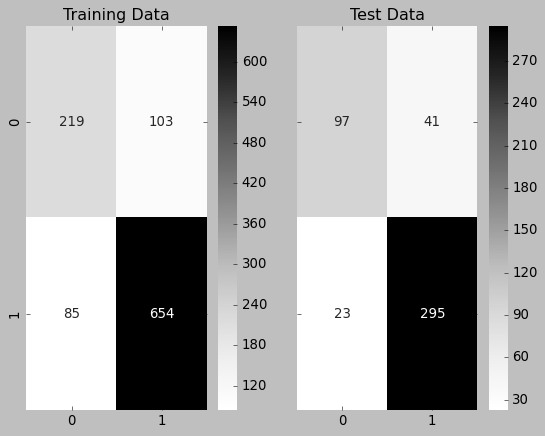

In [81]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [82]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.72      0.68      0.70       322
           1       0.86      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.70      0.75       138
           1       0.88      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456
 



### Probability prediction for the training and test data

In [83]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [84]:
pred_prob_train[:,1]

array([0.87707621, 0.98860418, 0.38207137, ..., 0.98934949, 0.23328633,
       0.22310082])

AUC for the Training Data: 0.877
AUC for the Test Data: 0.915


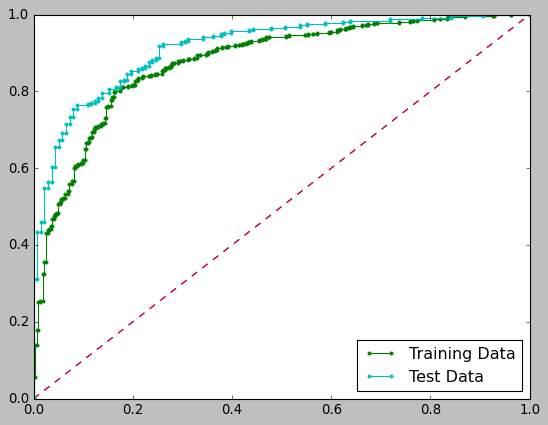

In [85]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

The model accuracy on the training as well as the test set is about 83% and 86% in logistic regression model and for LDA model train and test data it is 82% and 86%. 
Both models are fit and among them logistic regression is having ahigher accuracy compared to LDA.
 


### unique values for categorical variables

In [86]:
for column in df_s2.columns:
    if df_s2[column].dtype == 'object':
        print(column.upper(),': ',df_s2[column].nunique())
        print(df_s2[column].value_counts().sort_values())
        print('\n')

### Scaling the variables as continuous variables have different weightage using min-max technique

In [87]:
cat1=[]
num1=[]
for i in df_s2.columns:
    if df_s2[i].dtype=="object":
        cat1.append(i)
    else:
        num1.append(i)
print(cat1) 
print(num1)

[]
['vote', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']


In [88]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [89]:
num2=['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'] 
### removing the correlated variable which was dropped earlier and target variable


In [90]:
df_s2[num2] = df_s2[num2].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [91]:
## Check if the variables have been scaled or not
df_s2.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,1,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0.0
2,1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1.0
3,1,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1.0
4,1,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0.0
5,1,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1.0


### Train-Test Split

In [92]:
df_s2.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [93]:
# Copy all the predictor variables into X dataframe
X = df_s2.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df_s2['vote']

In [94]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0.0
2,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1.0
3,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1.0
4,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0.0
5,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1.0


In [95]:
y.head()

1    1
2    1
3    1
4    1
5    1
Name: vote, dtype: int8

In [96]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Naive Bayes Model

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [98]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [99]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [100]:
y_test.value_counts()

1    303
0    153
Name: vote, dtype: int64

In [101]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



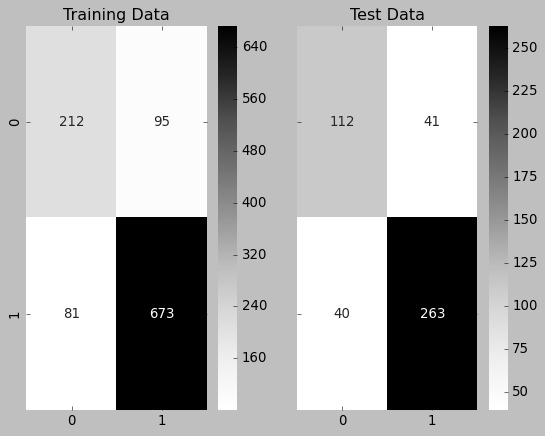

In [102]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [103]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC for the Training Data: 0.792
AUC for the Test Data: 0.800


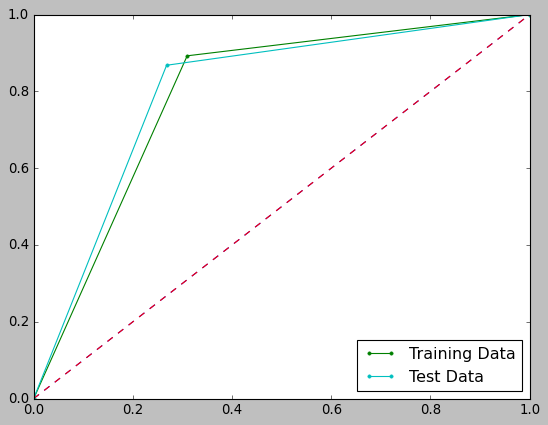

In [104]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()



## Discriminant Analysis

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [106]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [107]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



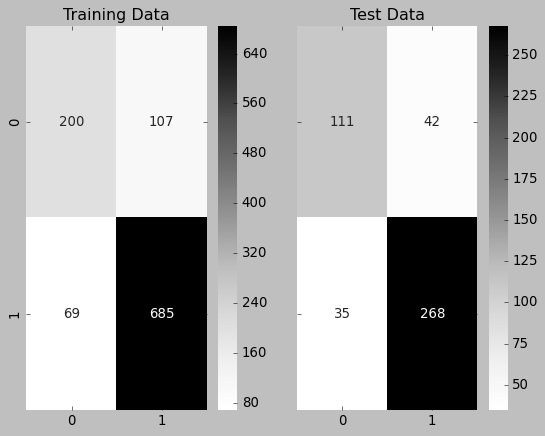

In [108]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [109]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.780
AUC for the Test Data: 0.805


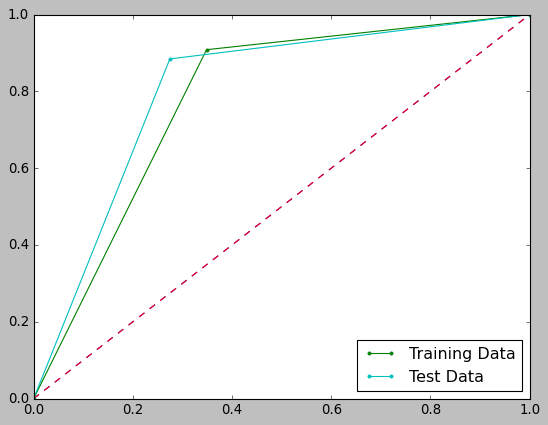

In [110]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

The model accuracy on the training as well as the test set is about 83% and 86% in logistic regression model and for LDA model train and test data it is 82% and 86%. 
Both models are fit and among them logistic regression is having ahigher accuracy compared to LDA.
 


## Ada Boost

from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

## Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

## KNN Model

In [111]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [112]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8576814326107446
[[221  86]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       307
           1       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.86      0.86      0.86      1061



In [113]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[108  45]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



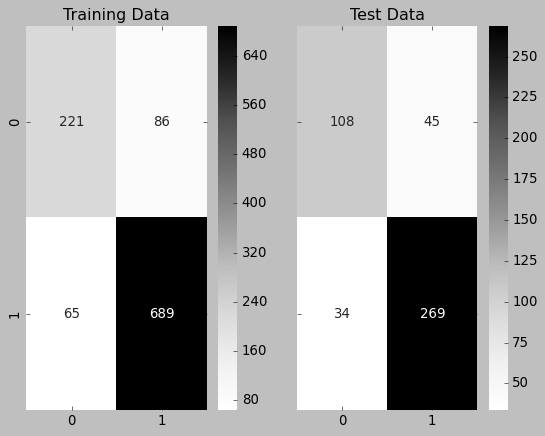

In [114]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [115]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.72      0.75       307
           1       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.86      0.86      0.86      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456
 



AUC for the Training Data: 0.817
AUC for the Test Data: 0.797


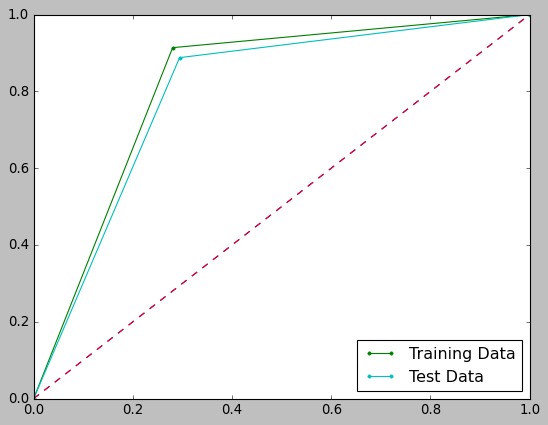

In [116]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [118]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [119]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[105  48]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



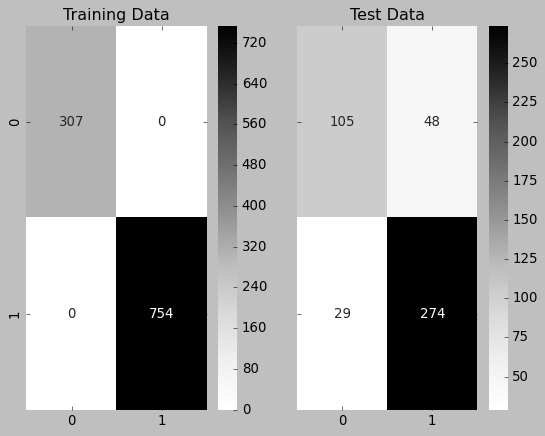

In [120]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [121]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 1.000
AUC for the Test Data: 0.795


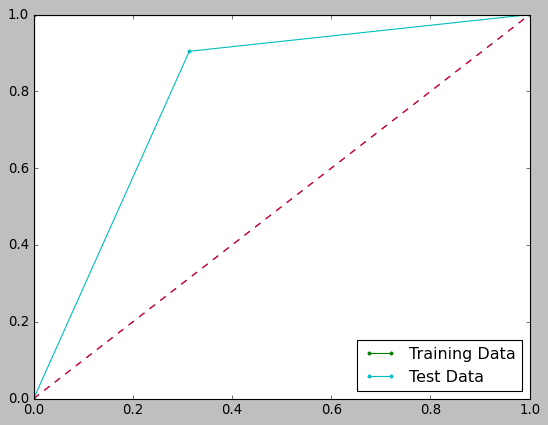

In [122]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Bagging

In [123]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [124]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9660697455230914
[[277  30]
 [  6 748]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [125]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



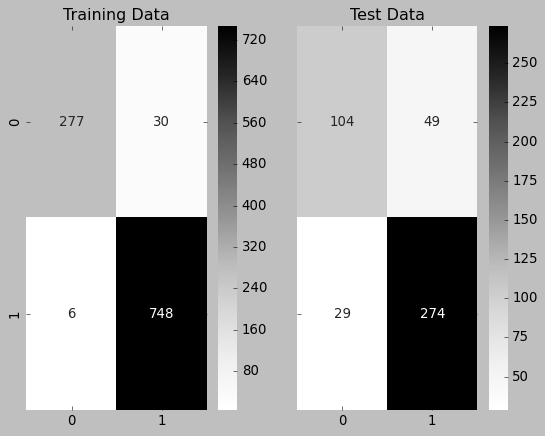

In [126]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [127]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.947
AUC for the Test Data: 0.792


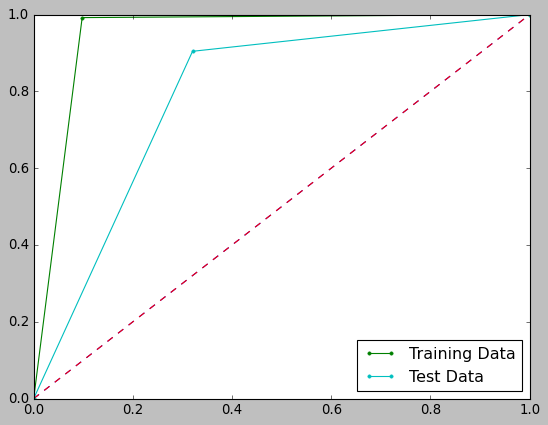

In [128]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

GRADIENT BOOSTING

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [130]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [131]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[104  49]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



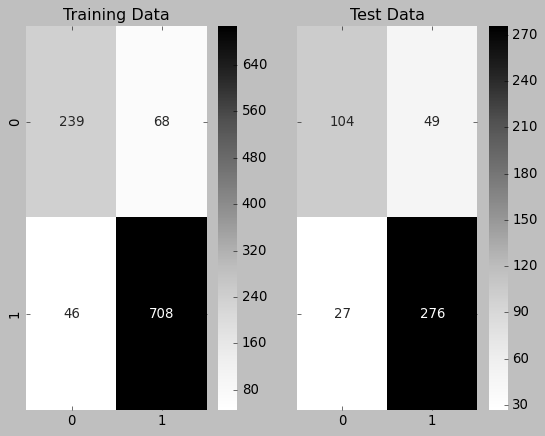

In [132]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [133]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.859
AUC for the Test Data: 0.795


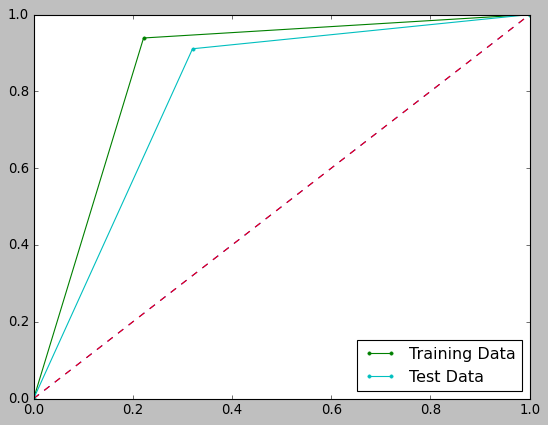

In [134]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Ada Boost

In [135]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [136]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [137]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



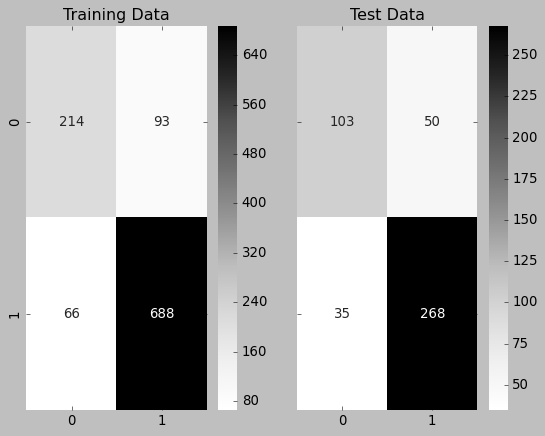

In [138]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [139]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



AUC for the Training Data: 0.805
AUC for the Test Data: 0.779


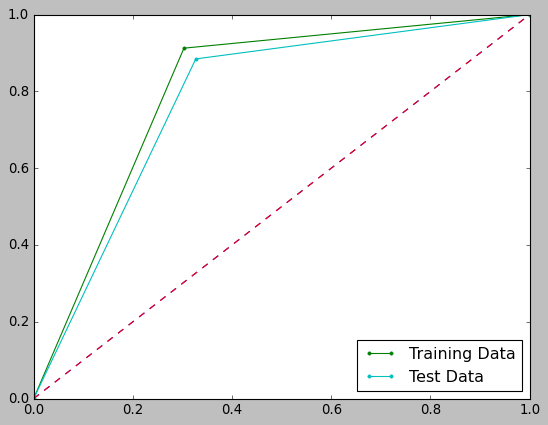

In [140]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Comparison of Different Models:

Interest Class is 1 i.e. vote_labour party =1.

Let's look at the performance of all the models on the Train Data set

Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.

Logistic Regression - Recall for class 1 is .90.
0.827521206409048
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061


Naive Bayes - Recall for class "1" is 0.89. 
0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061


Linear Discriminant Analysis - Recall for class "1" is 0.91.
0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061


ADA Boosting - Recall for class "1" is 0.91
0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061

Gradient Boosting - Recall for class "1" is 0.94.
0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061

KNN - Recall for class "1" is 0.91.
0.8576814326107446
[[221  86]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       307
           1       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.86      0.86      0.86      1061

Random Forest - Recall of class 1 is 1.
1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061


Bagging - Recall for class "1" is 0.99.
0.9660697455230914
[[277  30]
 [  6 748]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061

So as per the train data, Worst performing models are - Naive Bayes, Linear Discriminant Analysis. Best Performing models are -random forest, Bagging , Gradient Boosting and KNN. However are these best performing models overfitted.

Let's look at the performance on the test data set

Recall on the Test Data Set
Logistic Regression - Recall for class 1 is .93.
0.8574561403508771
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456

Naive Bayes - Recall for class "1" is 0.87.
0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456


Linear Discriminant Analysis - Recall for class "1" is 0.88.
0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456

ADA Boosting - Recall for class "1" is 0.88.

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456

Gradient Boosting - Recall for class "1" is 0.91.
0.8333333333333334
[[104  49]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456


KNN - Recall for class "1" is 0.89
0.8267543859649122
[[108  45]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456

Random Forest -Recall for class 1 is 0.90.
0.831140350877193
[[105  48]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456





Bagging - Recall for class "1" is 0.90.
0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456

Logistic regression did not perform well on train set but performed well on test set after scaling. The remaining models which have not performed well on the train data set have also not performed well on the test data set However random forest and Bagging which had high model score nearly 100% score on the train data set has less result(82% - 83%) on the test data set. Hence, the data may be oerfitting. So, SMOTE is performed on the models.

## SMOTE 

In [141]:
#pip install imbalanced-learn

In [142]:
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [143]:
X_train_res, y_train_res = SMOTE(random_state=2).fit_resample(X_train, y_train)

In [144]:
## Let's check the shape after SMOTE
X_train_res.shape


(1508, 8)

## Naive Bayes with SMOTE

In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [146]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [147]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8262599469496021
[[622 132]
 [130 624]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       754
           1       0.83      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



In [148]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8092105263157895
[[125  28]
 [ 59 244]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.81      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.82      0.81      0.81       456



KNN With SMOTE

In [149]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [150]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8859416445623343
[[713  41]
 [131 623]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       754
           1       0.94      0.83      0.88       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



In [151]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8070175438596491
[[125  28]
 [ 60 243]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



## Conclusion after SMOTE

Recall for Class 1


                        Train Data Set                  Test Data Set

Naive Bayes                .83                            .81
KNN                        .83                            .80

Recall for Naive Bayes and KNN decreased significantly.
Little Difference between the train and test dataset Recall value for KNN .
The data is neither overfit nor underfit. 
SMOTE is not preferred for this data.

## Cross Validation on Naive Bayes Model

In [152]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.8013245 , 0.82119205, 0.82781457, 0.76821192, 0.86092715,
       0.86754967, 0.76821192, 0.85430464, 0.80666667, 0.85333333])

In [153]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.76086957, 0.80434783, 0.89130435, 0.80434783, 0.86956522,
       0.86956522, 0.88888889, 0.84444444, 0.75555556, 0.82222222])

After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same.
Hence our model is valid.

